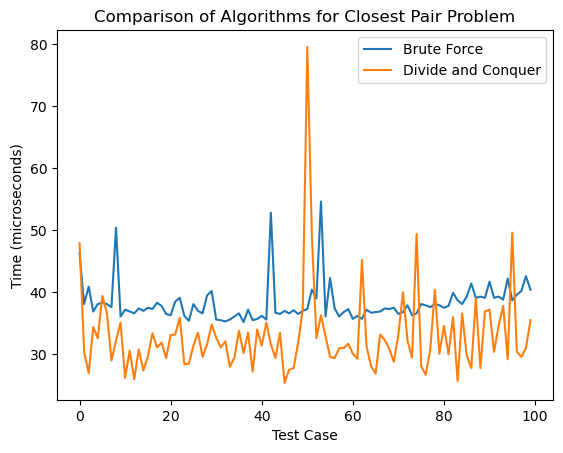

In [3]:
import math, time, random, matplotlib.pyplot as plt

def find_distance(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def brute_force_search(lis):
    m, c, count = float('inf'), (), 1
    for i in range(len(lis)):
        for j in range(i+1, len(lis)):
            d = find_distance(lis[i], lis[j])
            if count==1:
                m, c = d, (lis[i], lis[j])
                count += 1
            if d < m:
                m, c = d, (lis[i], lis[j])
    return [c, m]

def closest_pair(points):
    points.sort()
    return divide_conquer(points)

def divide_conquer(points):
    n, inf = len(points), float('inf')
    if n <= 1:
        return inf, None, None
    elif n == 2:
        return find_distance(points[0], points[1]), points[0], points[1]
    else:
        mid = n // 2
        left, right = points[:mid], points[mid:]
        d1, p1, q1 = divide_conquer(left)
        d2, p2, q2 = divide_conquer(right)
        d, p, q = (d1, p1, q1) if d1 < d2 else (d2, p2, q2)
        mid_point = points[mid][0]
        strip = [p for p in points if abs(p[0] - mid_point) < d]
        strip.sort(key=lambda point: point[1])
        m = d
        for i in range(len(strip)):
            j = i + 1
            while (j < len(strip)) and (strip[j][1] - strip[i][1] < m):
                dist = find_distance(strip[i], strip[j])
                if dist < m:
                    m, p, q = dist, strip[i], strip[j]
                j += 1
        return m, p, q

test_cases, brute_time, conquer_time = [], [], []
num_points=10
for i in range(100):
    num_points, points = 10, [(round(random.uniform(-100, 100), 3), round(random.uniform(-100, 100), 3)) for j in range(num_points)]
    test_cases.append(points)
    start = time.perf_counter_ns()
    bf_res = brute_force_search(points)
    end = time.perf_counter_ns()
    brute_time.append((end - start) / 1000)
    start = time.perf_counter_ns()
    dnc_res = closest_pair(points)
    end = time.perf_counter_ns()
    conquer_time.append((end - start) / 1000)

plt.plot(brute_time, label='Brute Force')
plt.plot(conquer_time, label='Divide and Conquer')
plt.xlabel('Test Case')
plt.ylabel('Time (microseconds)')
plt.title('Comparison of Algorithms for Closest Pair Problem')
plt.legend()
plt.show()
